## Figures for the chapter "Relational data and Model fitting"

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Timber

In [2]:
# Write data as a list of Diameter, Height, Volume, Diameter, Height, Volume ...
#   (as written in main text)
data_as_list = [
    8.3, 70, 10.3, 12.9, 85, 33.8, 
    8.6, 65, 10.3, 13.3, 86, 27.4, 
    8.8, 63, 10.2, 13.7, 71, 25.7, 
    10.5, 72, 16.4, 13.8, 64, 24.9, 
    10.7, 81, 18.8, 14.0, 78, 34.5, 
    10.8, 83, 19.7, 14.2, 80, 31.7, 
    11.0, 66, 15.6, 14.5, 74, 36.3, 
    11.0, 75, 18.2, 16.0, 72, 38.3, 
    11.1, 80, 22.6, 16.3, 77, 42.6, 
    11.2, 75, 19.9, 17.3, 81, 55.4, 
    11.3, 79, 24.2, 17.5, 82, 55.7, 
    11.4, 76, 21.0, 17.9, 80, 58.3, 
    11.4, 76, 21.4, 18.0, 80, 51.5, 
    11.7, 69, 21.3, 18.0, 80, 51.0, 
    12.0, 75, 19.1, 20.6, 87, 77.0, 
    12.9, 74, 22.2
]
# Reshape list into a two-dimentional array
data_as_2d_array = np.reshape(data_as_list, newshape=(-1,3))
# Create DataFrame from two-dimentional array
timber = pd.DataFrame(
    columns=['Diameter (in)', 'Height (feet)', 'Volume (cubic feet)'],
    data=data_as_2d_array
)
timber.to_csv('timber.csv', index=False)
timbre_reload = pd.read_csv('timber.csv')
timbre_reload.head()

Diameter (in)  Height (feet)  Volume (cubic feet)
0            8.3           70.0                 10.3
1           12.9           85.0                 33.8
2            8.6           65.0                 10.3
3           13.3           86.0                 27.4
4            8.8           63.0                 10.2

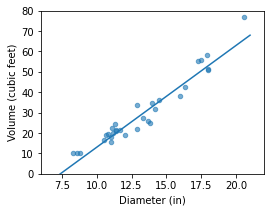

In [3]:
# Make scatter plot
timber.plot.scatter(
    figsize=(4,3),
    x='Diameter (in)',  # Diameter on first axis (x)
    y='Volume (cubic feet)',  # Volume on second axis (y)
    alpha=0.6  # Give a little bit of transparency
)


# Plot a line
x = np.arange(6,22,1)
y = 5*x-37
plt.plot(x, y, '-')

# Trim figure layout
plt.xlim(6,22)
plt.ylim(0,80)

plt.savefig(
    'timber_volume_diameter.pdf',
    bbox_inches='tight'
)

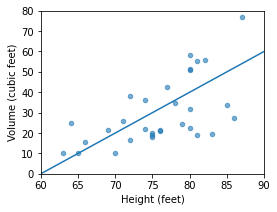

In [4]:
timber.plot.scatter(
    figsize=(4,3),
    x='Height (feet)',  # Diameter on first axis (x)
    y='Volume (cubic feet)',  # Volume on second axis (y)
    alpha=0.6  # Give a little bit of transparency
)

# Plot a line
x = np.arange(60,100,1)
y = 2*x-60*2
plt.plot(x, y, '-')

plt.xlim(60,90)
plt.ylim(0,80)

plt.savefig(
    'timber_volume_height.pdf',
    bbox_inches='tight'
)

## Cigarette comsumption

In [5]:
cigarette = pd.DataFrame(
    index = ['Norway', 'Sweden', 'Denmark', 'Australia'],
    data = {
        'x': [250, 300, 350, 470],
        'y': [95, 120, 165, 170]
    }
)
cigarette

x    y
Norway     250   95
Sweden     300  120
Denmark    350  165
Australia  470  170

Add information about first fit to table.

In [6]:
fit_1 = 0.3*cigarette['x'] + 34.75
resid_1 = cigarette['y'] - fit_1

cigarette['Fit 1'] = fit_1
cigarette['Resid 1'] = resid_1
cigarette

x    y   Fit 1  Resid 1
Norway     250   95  109.75   -14.75
Sweden     300  120  124.75    -4.75
Denmark    350  165  139.75    25.25
Australia  470  170  175.75    -5.75

Add information about second fit to table.

In [7]:
fit_2 = 0.4*cigarette['x'] + 0.50
resid_2 = cigarette['y'] - fit_2

cigarette['Fit 2'] = fit_2
cigarette['Resid 2'] = resid_2
cigarette

x    y   Fit 1  Resid 1  Fit 2  Resid 2
Norway     250   95  109.75   -14.75  100.5     -5.5
Sweden     300  120  124.75    -4.75  120.5     -0.5
Denmark    350  165  139.75    25.25  140.5     24.5
Australia  470  170  175.75    -5.75  188.5    -18.5

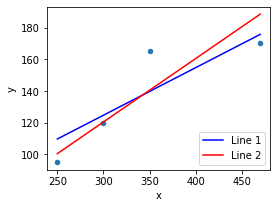

In [8]:
cigarette.plot.scatter(
    x='x',
    y='y',
    figsize=(4,3)
)
plt.plot(
    cigarette['x'],
    cigarette['Fit 1'],
    color='blue',
    label='Line 1'  # Lable used for legends
)
plt.plot(
    cigarette['x'],
    cigarette['Fit 2'],
    color='red',
    label='Line 2'  # Lable used for legends
)
plt.legend(loc='lower right')  # Add legends

plt.savefig(
    'cigarette_two_lines.pdf',
    bbox_inches='tight'
)

In [9]:
## Sum of squares

1 1 2
2 5 3
3 3 4


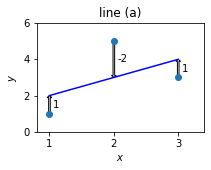

In [10]:
plt.figure(figsize=(3,2))
x = np.array([1,2,3])
y = np.array([1,5,3])
fit = x+1
plt.plot(x,y,'o')
plt.plot(x,fit,'b-')
for x0, y0, y1 in zip(x,y,fit):  # Draw deviation lines
    print(x0, y0, y1)
    dy=y1-y0
    plt.arrow(x0,y0,0,dy,
              width=0.025,
              length_includes_head=True,
              facecolor='white')
    plt.text(x0+0.05, (y0+y1)/2, f'{dy}',verticalalignment='center')
plt.xlim(0.8,3.4)
plt.ylim(0,6)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('line (a)')

plt.savefig(
    'residuals_silly_line_a.pdf',
    bbox_inches='tight'
)

1 1 4
2 5 3
3 3 2


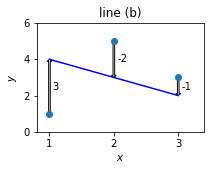

In [11]:
plt.figure(figsize=(3,2))
x = np.array([1,2,3])
y = np.array([1,5,3])
fit = 5-x
plt.plot(x,y,'o')
plt.plot(x,fit,'b-')
for x0, y0, y1 in zip(x,y,fit):  # Draw deviation lines
    print(x0, y0, y1)
    dy=y1-y0
    plt.arrow(x0,y0,0,dy,
              width=0.025,
              length_includes_head=True,
              facecolor='white')
    plt.text(x0+0.05, (y0+y1)/2, f'{dy}',verticalalignment='center')
plt.xlim(0.8,3.4)
plt.ylim(0,6)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('line (b)')

plt.savefig(
    'residuals_silly_line_b.pdf',
    bbox_inches='tight'
)

1 1 1.00001
2 5 2.00001
3 3 3.00001


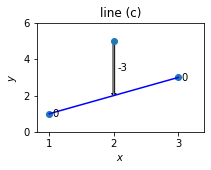

In [12]:
plt.figure(figsize=(3,2))
x = np.array([1,2,3])
y = np.array([1,5,3])
fit = x+0.00001
plt.plot(x,y,'o')
plt.plot(x,fit,'b-')
for x0, y0, y1 in zip(x,y,fit):  # Draw deviation lines
    print(x0, y0, y1)
    dy=y1-y0
    plt.arrow(x0,y0,0,dy,
              width=0.025,
              length_includes_head=True,
              facecolor='white')
    plt.text(x0+0.05, (y0+y1)/2, f'{dy:1.0f}',verticalalignment='center')
plt.xlim(0.8,3.4)
plt.ylim(0,6)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('line (c)')

plt.savefig(
    'residuals_silly_line_c.pdf',
    bbox_inches='tight'
)

In [13]:
# Compute best fit with NumPy
x = np.array([1,2,3])
y = np.array([1,5,3])
polynomial_degree = 1
p = np.polyfit(x,y,polynomial_degree)
a = p[0]  # slope
b = p[1]  # intersection
print(f'Best fit: y(x) = {a:1.3f}x+{b:1.3f}')

Best fit: y(x) = 1.000x+1.000


# Pendulum example

In [14]:
# Data as numpy arrays
x = np.array([175.2, 151.5, 126.4, 101.7, 77.0])
T = np.array([2.650, 2.468, 2.256, 2.024, 1.764])

# Data in a Pandas table
df = pd.DataFrame({
    'Length, $x$ (cm)': x,
    'Period, $T$ (s)': T
})
df

Length, $x$ (cm)  Period, $T$ (s)
0             175.2            2.650
1             151.5            2.468
2             126.4            2.256
3             101.7            2.024
4              77.0            1.764

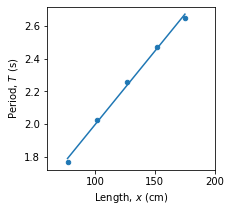

In [15]:
# Fit line
from numpy.polynomial.polynomial import polyfit
b, a = polyfit(x, T, 1)
fit = a*x+b
df['linear fit'] = fit

# Make plot of data and fit
df.plot.scatter(
    x='Length, $x$ (cm)',
    y='Period, $T$ (s)',
    figsize=(3,3),
)
plt.plot(x, fit)
plt.xlim(60,200)
plt.savefig('pendulum_linear_fit.pdf', bbox_inches='tight')

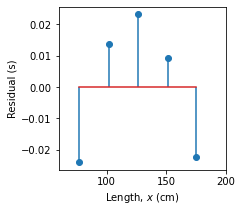

In [16]:
# Compute residuals
residual = T-fit
df['residual'] = residual


plt.figure(figsize=(3,3))
plt.stem(x,residual)
plt.xlim(60,200)

plt.ylabel('Residual (s)')
plt.xlabel('Length, $x$ (cm)')
plt.savefig('pendulum_linear_residual.pdf', bbox_inches='tight')

In [17]:
# Add periode sqared to table
df['Period squared, $T^2$ (s$^2$)'] = T*T

#Show table
df

Length, $x$ (cm)  Period, $T$ (s)  linear fit  residual  \
0             175.2            2.650    2.672136 -0.022136   
1             151.5            2.468    2.458751  0.009249   
2             126.4            2.256    2.232760  0.023240   
3             101.7            2.024    2.010371  0.013629   
4              77.0            1.764    1.787982 -0.023982   

   Period squared, $T^2$ (s$^2$)  
0                       7.022500  
1                       6.091024  
2                       5.089536  
3                       4.096576  
4                       3.111696

# Method for fitting

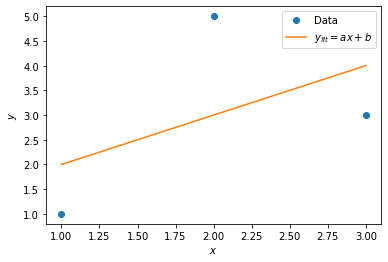

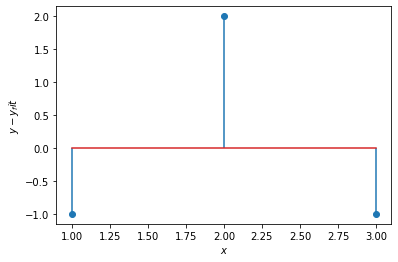

Slope: a = 1.0; Intersection: b = 1.0


In [18]:
import pandas as pd
import matplotlib.pyplot as plt

def best_linear_fit(x, y):
    ''' Best linear fit to x and y. 
    It is assumed that x and y are Pandas Series.
    Return slope and intersection as tuple.'''
    
    # Find coefficients for best fit
    a = x.cov(y)/x.var()
    b = y.mean()-a*x.mean()
    y_fit = a*x + b
    
    # Plot fit
    plt.figure()
    plt.plot(x, y, 'o', label='Data')
    plt.plot(x, y_fit, '-', label=r'$y_{fit} = ax+b$')
    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')
    plt.legend()
    plt.show()
    
    # Plot resudual
    plt.figure()
    plt.stem(x, y-y_fit)
    plt.xlabel(r'$x$')
    plt.ylabel(r'$y-y_fit$')
    plt.show()
    
    return a, b

# Test
df = pd.DataFrame({
    'x': [1.0, 2.0, 3.0],
    'y': [1.0 ,5.0, 3.0]
})
x = df['x']
y = df['y']
a, b = best_linear_fit(x, y)
print(f'Slope: a = {a}; Intersection: b = {b}')

A version that uses numpy

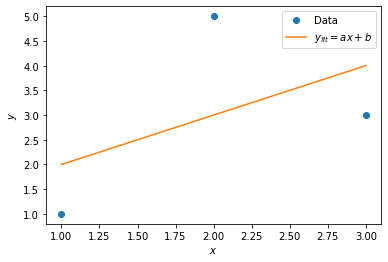

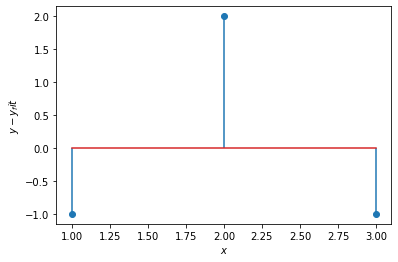

Slope: a = 1.0000000000000002; Intersection: b = 1.0000000000000002


In [19]:
def best_linear_fit(x, y):
    ''' Best linear fit to x and y. 
    Return slope and intersection as tuple.'''
    # Fit
    from numpy.polynomial.polynomial import polyfit
    b, a = polyfit(x, y, 1)
    y_fit = a*np.array(x) + b
    
    # Plot fit
    plt.figure()
    plt.plot(x, y, 'o', label='Data')
    plt.plot(x, y_fit, '-', label=r'$y_{fit} = ax+b$')
    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')
    plt.legend()
    plt.show()
    
    # Plot resudual
    plt.figure()
    plt.stem(x, y-y_fit)
    plt.xlabel(r'$x$')
    plt.ylabel(r'$y-y_fit$')
    plt.show()
    
    return a, b

# Test of method
x = [1.0, 2.0, 3.0]
y = [1.0 ,5.0, 3.0]
a, b = best_linear_fit(x, y)
print(f'Slope: a = {a}; Intersection: b = {b}')

## Data for exercises


In [20]:
year = [
    1790,
    1800,
    1810,
    1820,
    1830,
    1840,
    1850,
    1860,
    1870,
    1880,
    1890,
    1900,
    1910
]
pop = [
    3.929,
    5.308,
    7.240,
    9.638,
    12.866,
    17.069,
    23.192,
    31.443,
    38.558,
    50.156,
    62.948,
    75.995,
    91.972
]
pd.DataFrame({'Year': year, 'Population': pop}).to_csv('USpop.csv', index=False)